# index & column how to manipulate

In [21]:
import pandas as pd
import numpy as np

## 행(row) index / columns 설정

>pd.DataFrame( 2차원배열,  index = 행 인덱스 배열(default=integer position),  columns= 열 이름 배열 )

In [22]:
df = pd.DataFrame([[14,'남','목동'],[16,'여','성수동']]
                  , index = ['김씨','박씨']
                  , columns=['나이','성별','거주지'])

print(df.index)
print(df.columns)
df


Index(['김씨', '박씨'], dtype='object')
Index(['나이', '성별', '거주지'], dtype='object')


,나이,성별,거주지
김씨,14,남,목동
박씨,16,여,성수동


## 새로운 인덱스와 컬럼명 지정해주기 ( by df.index, df.columns)

In [23]:
# 인덱스 바꾸기
print(df.index)
df.index = ['김철수','박미정']
df.index

Index(['김씨', '박씨'], dtype='object')


Index(['김철수', '박미정'], dtype='object')

In [24]:
# 컬럼명 지정해주기
print(df.columns)
df.columns = ['age','sex','address']
df.columns

Index(['나이', '성별', '거주지'], dtype='object')


Index(['age', 'sex', 'address'], dtype='object')

### by df.rename
df.renaem( 바꿀것, inplace= (True 직접 바꾼다., False 원본은 그대로 놓아 둔다.) )

In [25]:
df

,age,sex,address
김철수,14,남,목동
박미정,16,여,성수동


In [26]:
# inplace=True 하지 않으면 바뀌지않는다.
df.rename(columns={'age':'연령','sex':'남녀'})
df

,age,sex,address
김철수,14,남,목동
박미정,16,여,성수동


In [27]:
df.rename(columns={'age':'연령','sex':'남녀'},index={'김철수':'Kim'},inplace=True)
df

,연령,남녀,address
Kim,14,남,목동
박미정,16,여,성수동


## 순서바꾸기 column
* 이름만을 바꾸는것이 아니라 value값도 같이 바뀌어야 한다.

In [30]:
# 객체를 생성하고~
cols = df.columns.tolist()
cols

['연령', '남녀', 'address']

In [31]:
cols = [cols[2],cols[1],cols[0]]
cols

['address', '남녀', '연령']

In [35]:
# 다시 지정해주면 끝~
df = df[cols]
df

,address,남녀,연령
Kim,목동,남,14
박미정,성수동,여,16


# index 객체 활용

* DataFrame을 조회 하거나 조작할때 특정 index에 접근하게 된다. 
* 활용하면 손쉽게 조작이 가능하다

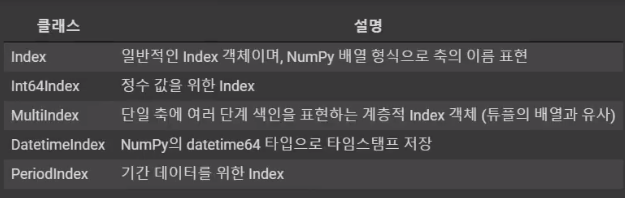

In [36]:
idx = pd.Index([2, 4, 6, 8, 10])
idx

Int64Index([2, 4, 6, 8, 10], dtype='int64')

In [37]:
idx[1]

4

In [38]:
idx[1:2:2]

Int64Index([4], dtype='int64')

In [39]:
idx[-1::]

Int64Index([10], dtype='int64')

In [40]:
idx[::2]

Int64Index([2, 6, 10], dtype='int64')

In [41]:
print(idx)
print(idx.size)
print(idx.shape)
print(idx.ndim)
print(idx.dtype)

Int64Index([2, 4, 6, 8, 10], dtype='int64')
5
(5,)
1
int64


## index를 활용한 조작

In [50]:
df = pd.DataFrame(np.random.randint(1, 5, (10,3)),
                 columns=['A','B','C'])
df

,A,B,C
0,4,4,1
1,2,4,1
2,3,2,2
3,1,4,4
4,3,3,1
5,4,4,3
6,4,1,3
7,3,3,3
8,3,4,3
9,2,1,1


In [52]:
df.index.tolist()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [55]:
idx = df.index
idx[::2].tolist()

[0, 2, 4, 6, 8]

In [57]:
df.iloc[idx[::2],:]

,A,B,C
0,4,4,1
2,3,2,2
4,3,3,1
6,4,1,3
8,3,4,3


## index 연산

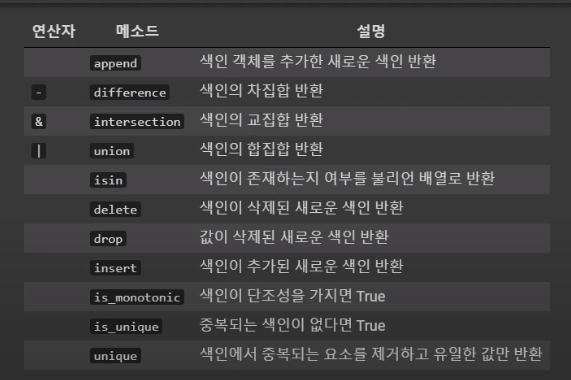

In [59]:
idx1 = pd.Index([1,2,4,6,8])
idx2 = pd.Index([2,4,5,6,7])
print(idx1.append(idx2))
print()
print(idx1.difference(idx2))
print()
print(idx1 - idx2) # 위에 강의 오타~ 그냥 -는 빼준다 (단순 뺄샘임) 차집합은 ^임
print(idx1.intersection(idx2))
print(idx1 & idx2)
print(idx1.union(idx2))
print(idx1 | idx2)
print(idx1.delete(0))
print(idx1.drop(1))
print(idx1 ^ idx2) # 여집합

Int64Index([1, 2, 4, 6, 8, 2, 4, 5, 6, 7], dtype='int64')

Int64Index([1, 8], dtype='int64')

Int64Index([-1, -2, -1, 0, 1], dtype='int64')
Int64Index([2, 4, 6], dtype='int64')
Int64Index([2, 4, 6], dtype='int64')
Int64Index([1, 2, 4, 5, 6, 7, 8], dtype='int64')
Int64Index([1, 2, 4, 5, 6, 7, 8], dtype='int64')
Int64Index([2, 4, 6, 8], dtype='int64')
Int64Index([2, 4, 6, 8], dtype='int64')
Int64Index([1, 5, 7, 8], dtype='int64')
